# Import library

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('student_placement_data.csv')

In [12]:
df

,cgpa,iq,placed
0,6.87,142,0
1,9.75,131,1
2,8.66,83,0
3,7.99,102,1
4,5.78,94,0
...,...,...,...
95,7.47,129,1
96,7.61,102,1
97,7.14,110,1
98,5.13,121,0


In [13]:
df.head()

,cgpa,iq,placed
0,6.87,142,0
1,9.75,131,1
2,8.66,83,0
3,7.99,102,1
4,5.78,94,0


<style>
.step-box {
  background: #e6f4ea; /* Soft green background */
  border-left: 6px solid #2d6a4f; /* Dark green border */
  padding: 15px;
  margin: 10px 0;
  border-radius: 10px;
  font-family: 'Times New Roman', Times, serif;
  box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1);
}
.step-box h3 {
  color: #1b4332; /* Dark green text */
  margin-bottom: 10px;
}
.step-box ul {
  list-style-type: "👉 ";
  padding-left: 20px;
}
.step-box li {
  margin: 8px 0;
  font-size: 16px;
  color: #1b4332; /* Dark green text */
}
</style>

<div class="step-box">
  <h3>🚀 Model Building Steps</h3>
  <ul>
    <li>Preprocessing + EDA + Feature Selection</li>
    <li>Extract input and output columns</li>
    <li>Scale the values</li>
    <li>Train-test split</li>
    <li>Train the model</li>
    <li>Evaluate the model / Model selection</li>
    <li>Deploy the model</li>
  </ul>
</div>


# Cheacking our data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    100 non-null    float64
 1   iq      100 non-null    int64  
 2   placed  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [15]:
df.shape

(100, 3)

# Perform EDA

In [16]:
import matplotlib.pyplot as plt

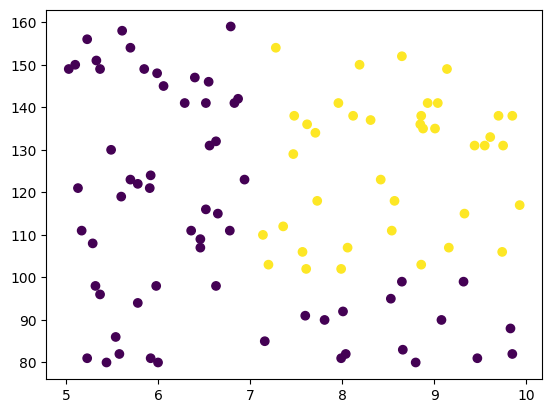

In [19]:
plt.scatter(df['cgpa'],df['iq'],c=df['placed'])

In [27]:
 X= df.iloc[:,0:2]


In [28]:
y = df.iloc[:,-1]

In [29]:
X

,cgpa,iq
0,6.87,142
1,9.75,131
2,8.66,83
3,7.99,102
4,5.78,94
...,...,...
95,7.47,129
96,7.61,102
97,7.14,110
98,5.13,121


In [30]:
y

,placed
0,0
1,1
2,0
3,1
4,0
...,...
95,1
96,1
97,1
98,0


# Import train test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1)

In [34]:
X_train

,cgpa,iq
65,7.71,134
9,8.54,111
72,5.03,149
74,8.53,95
27,7.57,106
...,...,...
81,8.12,138
8,8.01,92
30,8.04,82
44,6.29,141


In [35]:
y_train

,placed
65,1
9,1
72,0
74,0
27,1
...,...
81,1
8,0
30,0
44,0


# Scalling the value

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_train

array([[ 0.2254203 ,  0.61446457],
       [ 0.77142861, -0.34188254],
       [-1.53759448,  1.2381692 ],
       [ 0.76485019, -1.00716748],
       [ 0.13332251, -0.54978408],
       [ 1.43584836,  0.48972364],
       [-1.31392843, -0.96558717],
       [-0.48504835,  0.53130395],
       [ 1.12666293, -1.21506903],
       [ 0.98193783, -0.67452501],
       [-0.95211569, -1.58929181],
       [-1.47181035,  0.07392055],
       [ 1.56741662,  0.48972364],
       [-0.00482417, -0.30030223],
       [ 1.10034928,  0.90552673],
       [-1.15604651,  1.61239198],
       [-0.89948839, -1.63087212],
       [ 1.62004393, -1.29822965],
       [ 1.63320076,  0.7807858 ],
       [ 0.15305775, -1.17348872],
       [ 0.40961587, -1.58929181],
       [-0.95869411,  0.07392055],
       [-1.4454967 , -0.34188254],
       [ 1.53452456,  0.7807858 ],
       [ 1.68582806, -0.09240069],
       [-1.31392843,  1.2381692 ],
       [-0.13639244, -1.42297057],
       [-0.05745148,  1.44607074],
       [-0.63635185,

In [40]:
X_test = scaler.transform(X_test)

In [41]:
X_test

array([[-0.38637214, -0.34188254],
       [-0.48504835, -0.88242656],
       [ 1.36348581,  0.48972364],
       [-0.28111753,  0.15708117],
       [ 0.06753838,  0.40656302],
       [-0.47189152, -0.1755613 ],
       [ 0.69248765,  0.15708117],
       [-1.2020954 , -1.38139026],
       [-0.55741089, -0.133981  ],
       [ 0.16621458,  0.69762518]])

# Import Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression()

# Model training

In [44]:
clf.fit(X_train,y_train)

LogisticRegression()

# Evelaute the model

In [47]:
y_pred = clf.predict(X_test)

In [46]:
y_test

,placed
63,0
85,0
88,1
60,0
95,1
82,0
38,1
99,0
36,0
17,1


# Check Accuracy of Model

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.9

# Plot Dession line

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

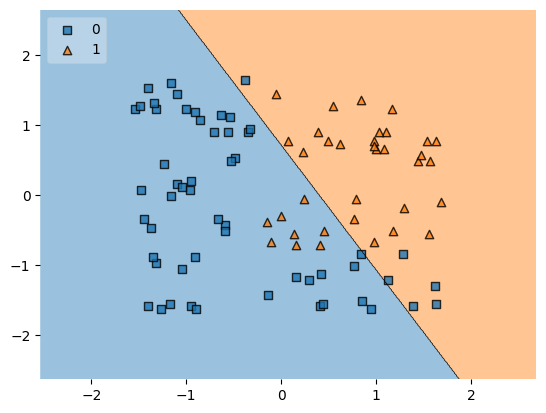

In [52]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)